# HW 1

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [166]:
diamonds_df = pd.read_csv('diamonds.csv')

In [167]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


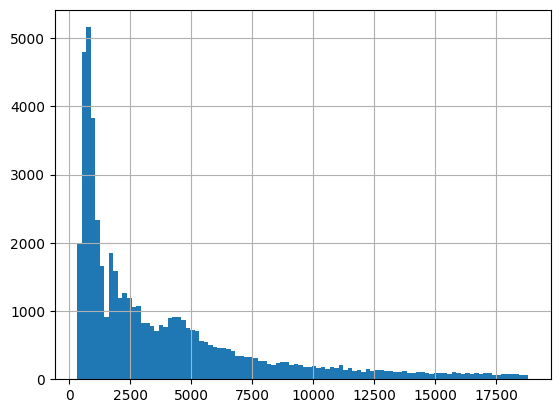

In [168]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid()

# Подготовка данных

In [169]:
diamonds_df = pd.read_csv('diamonds.csv')
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [170]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [171]:

diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [172]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [174]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
score = r2_score(y_pred, y_test)

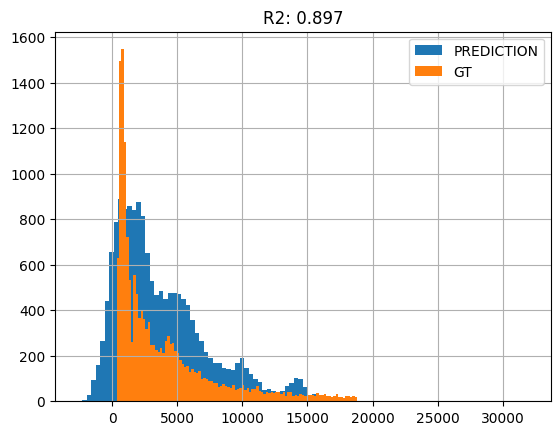

In [ ]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [175]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.coef = None
        self.bias = None

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        n_s, n_f = X.shape
        self.coef = np.random.randn(n_f)
        self.bias = 0
        y = y.ravel()
        for _ in range(self.n_iter):
            Y_pred = np.dot(X, self.coef) + self.bias
            diff = y - Y_pred
            grad_loss = 2 * np.dot(X.T, diff) / n_s
            grad_bias = 2 * np.sum(diff) / n_s
            self.coef += self.learning_rate * grad_loss
            self.bias += self.learning_rate * grad_bias
    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return np.dot(X, self.coef) + self.bias


    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return self.coef, self.bias


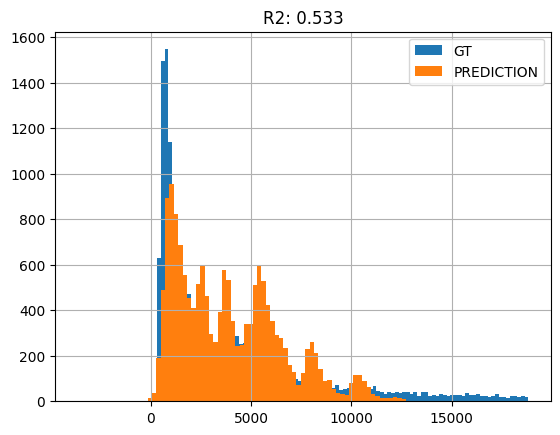

In [176]:
reg = LinearRegressorGD(n_iter=4000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_pred, y_test)
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.legend()
plt.grid()

In [ ]:
score = r2_score(y_pred, y_test)

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
diamonds_df = pd.read_csv('diamonds.csv')
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))
X = diamonds_df[features].copy().values
y = diamonds_df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaler1 = MinMaxScaler()
y_train = scaler1.fit_transform(y_train)
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=50, batch_size = 10):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.coefs = []
        self.biases = []
        self.batch_size = batch_size


    def sigm(self, z):
      return 1 / (1 + np.exp(-z))

    def sigm_der(self, sigm):
      return sigm*(1-sigm)

    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        outputs = [X]
        for i in range(len(self.coefs)-1):
          outputs.append(self.sigm(np.dot(outputs[i], self.coefs[i]) + self.biases[i]))
        pred = np.dot(outputs[-1], self.coefs[-1]) + self.biases[-1]
        outputs.append(pred)
        return outputs


    def backward(self, X, y):
        """
        Реализация backward pass

        Возвращает:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        outputs = self.forward(X)
        y = y.reshape(-1,1)
        grad_losses = [None for _ in range(len(self.coefs))]
        grad_biases = [None for _ in range(len(self.biases))]
        diff = 2 * (outputs[-1] - y) / y.shape[0]
        grad_losses[-1] = np.dot(outputs[-2].T, diff)
        grad_biases[-1] = np.sum(diff, axis=0, keepdims=True)
        prev_diff = diff
        for i in range(len(self.coefs)-2,-1,-1):
          diff = np.dot(prev_diff, self.coefs[i+1].T)* self.sigm_der(outputs[i+1])
          grad_losses[i] = np.dot(outputs[i].T, diff)
          grad_biases[i] = np.sum(diff, axis=0, keepdims=True)
          prev_diff = diff
        return grad_losses, grad_biases

    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        n_s, n_f = X.shape
        layers_sizes = [n_f] + list(self.hidden_layer_sizes) + [1]
        for i in range(len(layers_sizes)-1):
          self.coefs.append(np.random.randn(layers_sizes[i],layers_sizes[i+1]))
          self.biases.append(np.random.randn(1,layers_sizes[i+1]))
        y = y.ravel()
        ind = np.arange(n_s)
        for _ in range(self.n_iter):
          np.random.shuffle(ind)
          for i in range(0, n_s, self.batch_size):
            batch_ind = ind[i:i+self.batch_size]
            X_batch = X[batch_ind]
            y_batch = y[batch_ind]
            grad_losses, grad_biases = self.backward(X_batch,y_batch)
            for i in range(len(layers_sizes)-1):
              self.coefs[i] -= self.learning_rate * grad_losses[i]
              self.biases[i] -= self.learning_rate * grad_biases[i]

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return self.forward(X)[-1]

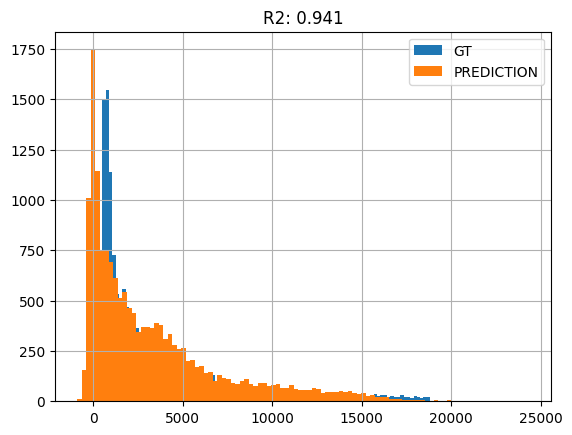

In [179]:
regr = MLPRegressor(hidden_layer_sizes=(20,8), n_iter=10, batch_size=1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred = scaler1.inverse_transform(y_pred)
score = r2_score(y_pred, y_test)
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.legend()
plt.grid()